# **Iris Dataset Clustering Analysis**

# Implementation of KMeans and Hierarchical Clustering Techniques


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.colors import ListedColormap

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#4DBEEE', '#A2142F', '#77AC30']
markers = ['o', 's', 'D']

# **1. Loading and Preprocessing**

In [2]:
print("1. Loading and Preprocessing the Iris Dataset")
print("-" * 50)


1. Loading and Preprocessing the Iris Dataset
--------------------------------------------------


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

In [4]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in target]

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

Dataset shape: (150, 5)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           

In [5]:
# Visualize the original dataset with actual species
plt.figure(figsize=(12, 10))
# Using PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

<Figure size 1200x1000 with 0 Axes>

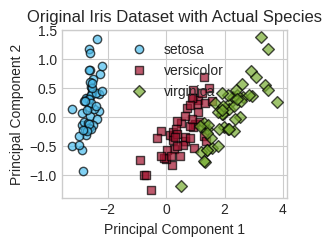

In [6]:
# Plot with actual species
plt.subplot(2, 2, 1)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[target == i, 0], X_pca[target == i, 1],
                c=colors[i], marker=markers[i], label=species, edgecolors='black', alpha=0.7)
plt.title('Original Iris Dataset with Actual Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [7]:
# Create a pairplot to visualize relationships between features
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', palette=colors)
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
plt.close()

<Figure size 1200x1000 with 0 Axes>

In [8]:
# Drop the species column for clustering
X_cluster = df.drop('species', axis=1).values


In [9]:
# Scale the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [10]:
print("\nData preprocessing completed. Features have been standardized.")
print(f"Shape of preprocessed data: {X_scaled.shape}")


Data preprocessing completed. Features have been standardized.
Shape of preprocessed data: (150, 4)


# **2A. KMeans Clustering Implementation**

In [11]:
print("\n2A. KMeans Clustering Implementation")
print("-" * 50)


2A. KMeans Clustering Implementation
--------------------------------------------------


In [12]:
print("""
KMeans Clustering Algorithm:
KMeans is a centroid-based clustering algorithm that partitions data into k clusters,
where each data point belongs to the cluster with the nearest mean (centroid).
The algorithm works as follows:
1. Initialize k centroids randomly.
2. Assign each data point to the closest centroid.
3. Recalculate centroids based on the current cluster memberships.
4. Repeat steps 2-3 until convergence (centroids no longer move significantly).

Why KMeans is suitable for the Iris dataset:
1. The Iris dataset contains well-defined, somewhat spherical clusters that KMeans can identify effectively.
2. The feature space is low-dimensional and continuous, which works well with KMeans.
3. The dataset is relatively small, so KMeans can efficiently process it.
4. The real Iris dataset has 3 species classes, which gives us a good starting point for choosing k=3.
""")


KMeans Clustering Algorithm:
KMeans is a centroid-based clustering algorithm that partitions data into k clusters, 
where each data point belongs to the cluster with the nearest mean (centroid). 
The algorithm works as follows:
1. Initialize k centroids randomly.
2. Assign each data point to the closest centroid.
3. Recalculate centroids based on the current cluster memberships.
4. Repeat steps 2-3 until convergence (centroids no longer move significantly).

Why KMeans is suitable for the Iris dataset:
1. The Iris dataset contains well-defined, somewhat spherical clusters that KMeans can identify effectively.
2. The feature space is low-dimensional and continuous, which works well with KMeans.
3. The dataset is relatively small, so KMeans can efficiently process it.
4. The real Iris dataset has 3 species classes, which gives us a good starting point for choosing k=3.



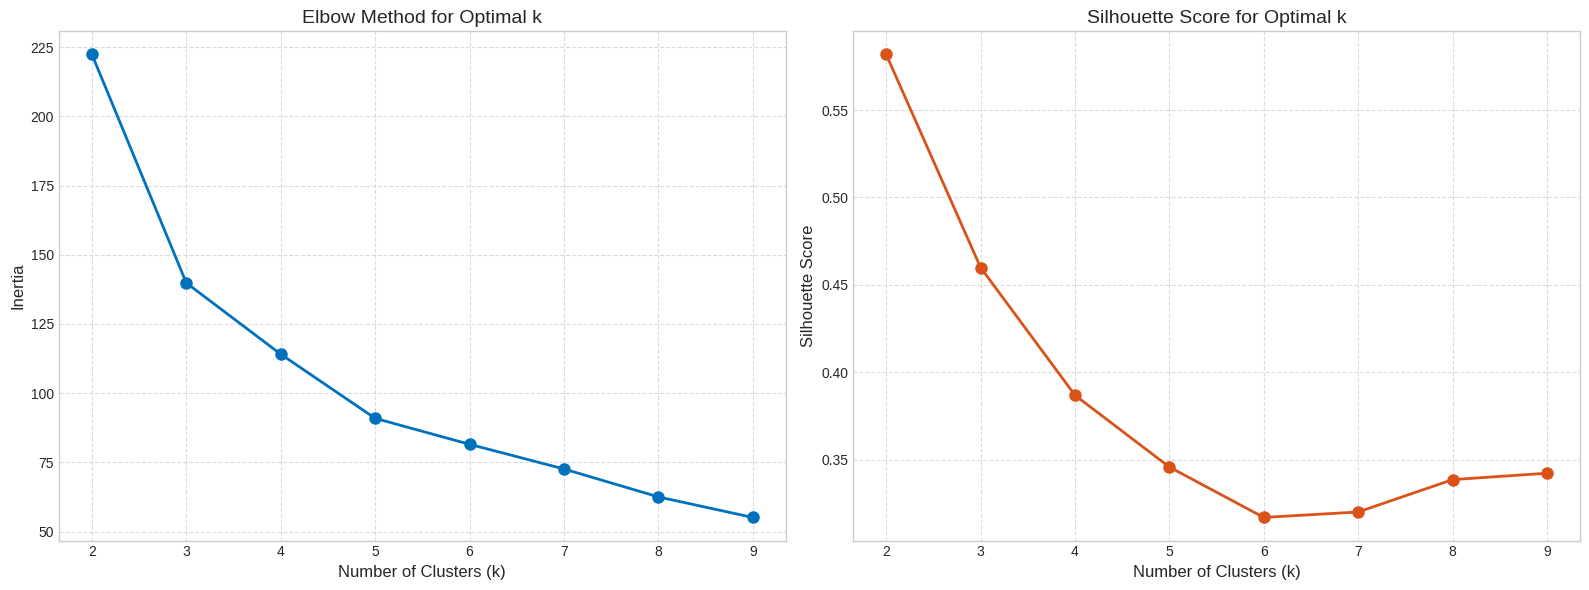

In [13]:
# Find the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 10)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.plot(k_range, inertia, 'o-', color='#0072BD', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', color='#D95319', linewidth=2, markersize=8)
plt.title('Silhouette Score for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)

plt.tight_layout()
plt.savefig('kmeans_optimization.png', dpi=300, bbox_inches='tight')

In [14]:

# Optimal k from analysis
optimal_k = 3  # Based on domain knowledge and elbow method


In [15]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [16]:
# Print cluster information
for i in range(optimal_k):
    print(f"Cluster {i}: {np.sum(kmeans_labels == i)} samples")

Cluster 0: 53 samples
Cluster 1: 50 samples
Cluster 2: 47 samples


In [17]:
# Compare with actual species
kmeans_comparison = pd.crosstab(
    index=kmeans_labels,
    columns=[iris.target_names[i] for i in iris.target],
    rownames=['Cluster'],
    colnames=['Species']
)
print("\nComparison between KMeans clusters and actual species:")
print(kmeans_comparison)

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"\nSilhouette Score for KMeans: {kmeans_silhouette:.4f}")



Comparison between KMeans clusters and actual species:
Species  setosa  versicolor  virginica
Cluster                               
0             0          39         14
1            50           0          0
2             0          11         36

Silhouette Score for KMeans: 0.4599


In [18]:
# Visualize KMeans clusters using PCA for dimensionality reduction
plt.figure(figsize=(20, 6))


<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

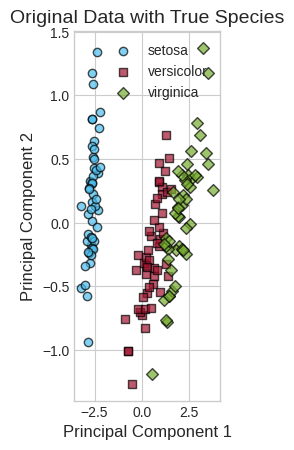

In [19]:
# Original data with true labels
plt.subplot(1, 3, 1)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[target == i, 0], X_pca[target == i, 1],
                c=colors[i], marker=markers[i], label=species, edgecolors='black', alpha=0.7)
plt.title('Original Data with True Species', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

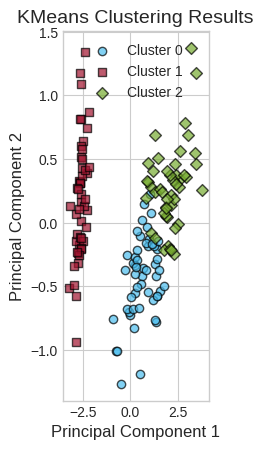

In [20]:
# KMeans clustering results
plt.subplot(1, 3, 2)
for i in range(optimal_k):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1],
                c=colors[i], marker=markers[i], label=f'Cluster {i}', edgecolors='black', alpha=0.7)
plt.title('KMeans Clustering Results', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

# KMeans centroids visualized

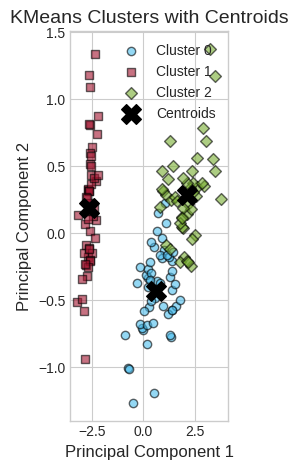

In [21]:
# Transform centroids to PCA space
centroids_pca = pca.transform(scaler.inverse_transform(kmeans.cluster_centers_))
plt.subplot(1, 3, 3)
for i in range(optimal_k):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1],
                c=colors[i], marker=markers[i], label=f'Cluster {i}', edgecolors='black', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('KMeans Clusters with Centroids', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

plt.tight_layout()
plt.savefig('kmeans_clusters.png', dpi=300, bbox_inches='tight')


# **2B. Hierarchical Clustering Implementation**

In [22]:
print("\n2B. Hierarchical Clustering Implementation")
print("-" * 50)

print("""
Hierarchical Clustering Algorithm:
Hierarchical clustering builds a hierarchy of clusters by either a bottom-up (agglomerative)
or top-down (divisive) approach. In the agglomerative approach:
1. Start with each data point as a separate cluster.
2. Merge the two closest clusters based on a linkage criterion.
3. Repeat step 2 until only one cluster remains or a stopping criterion is met.

Why Hierarchical Clustering is suitable for the Iris dataset:
1. It doesn't require specifying the number of clusters in advance, allowing for exploratory analysis.
2. It provides a hierarchical representation of the data, showing relationships between clusters.
3. It works well with smaller datasets like Iris.
4. It can discover nested cluster structures, which might be present in the Iris dataset.
5. It allows for different linkage methods to define cluster proximity, providing flexibility in cluster shape.
""")


2B. Hierarchical Clustering Implementation
--------------------------------------------------

Hierarchical Clustering Algorithm:
Hierarchical clustering builds a hierarchy of clusters by either a bottom-up (agglomerative) 
or top-down (divisive) approach. In the agglomerative approach:
1. Start with each data point as a separate cluster.
2. Merge the two closest clusters based on a linkage criterion.
3. Repeat step 2 until only one cluster remains or a stopping criterion is met.

Why Hierarchical Clustering is suitable for the Iris dataset:
1. It doesn't require specifying the number of clusters in advance, allowing for exploratory analysis.
2. It provides a hierarchical representation of the data, showing relationships between clusters.
3. It works well with smaller datasets like Iris.
4. It can discover nested cluster structures, which might be present in the Iris dataset.
5. It allows for different linkage methods to define cluster proximity, providing flexibility in cluster shape

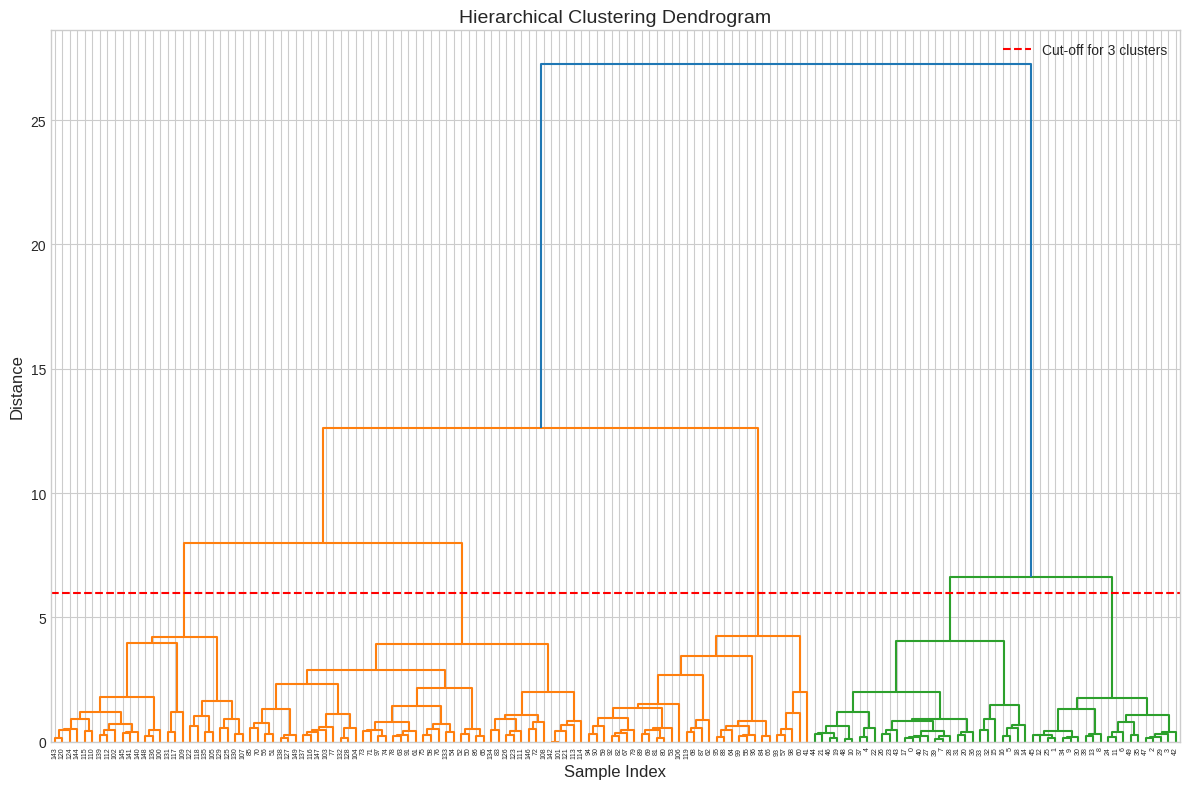

In [23]:
# Create a dendogram to help determine the optimal number of clusters
plt.figure(figsize=(12, 8))
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=6, color='r', linestyle='--', label='Cut-off for 3 clusters')
plt.legend()
plt.tight_layout()
plt.savefig('hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')

In [24]:
# From the dendogram, it looks like 3 clusters would be appropriate
n_clusters = 3

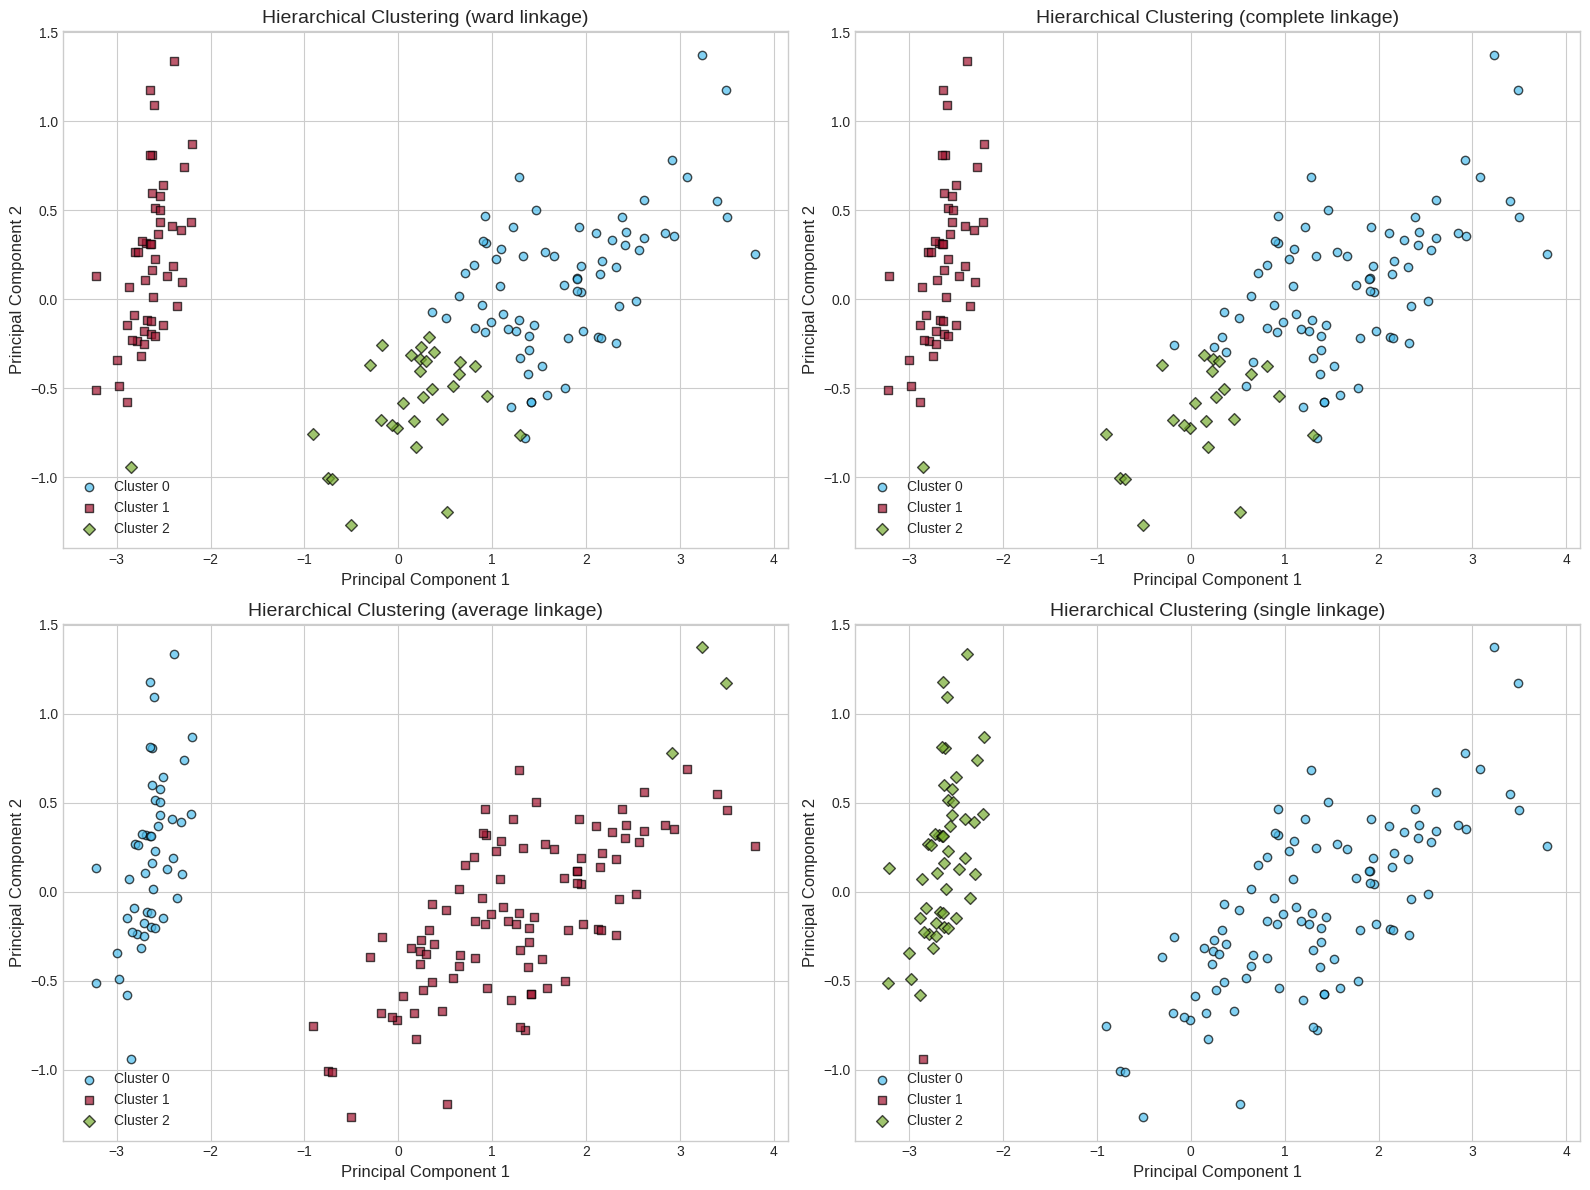

In [29]:
# Try different linkage methods and evaluate
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores_hc = []

plt.figure(figsize=(16, 12))

for i, method in enumerate(linkage_methods):
    # Apply hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    hc_labels = hc.fit_predict(X_scaled)
    silhouette_scores_hc.append(silhouette_score(X_scaled, hc_labels))

    # Visualize the clusters
    plt.subplot(2, 2, i+1)
    for j in range(n_clusters):
        plt.scatter(X_pca[hc_labels == j, 0], X_pca[hc_labels == j, 1],
                    c=colors[j], marker=markers[j], label=f'Cluster {j}', edgecolors='black', alpha=0.7)
    plt.title(f'Hierarchical Clustering ({method} linkage)', fontsize=14)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend()

plt.tight_layout()
plt.savefig('hierarchical_linkage_comparison.png', dpi=300, bbox_inches='tight')

In [30]:
# Use the best linkage method based on silhouette score
best_method_idx = np.argmax(silhouette_scores_hc)
best_method = linkage_methods[best_method_idx]
print(f"Best linkage method: {best_method} with silhouette score: {silhouette_scores_hc[best_method_idx]:.4f}")

Best linkage method: single with silhouette score: 0.5046


In [31]:
# Apply hierarchical clustering with the best linkage method
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_method)
hc_labels = hc.fit_predict(X_scaled)


In [32]:
# Print cluster information
for i in range(n_clusters):
    print(f"Cluster {i}: {np.sum(hc_labels == i)} samples")

# Compare with actual species
hc_comparison = pd.crosstab(
    index=hc_labels,
    columns=[iris.target_names[i] for i in iris.target],
    rownames=['Cluster'],
    colnames=['Species']
)
print("\nComparison between Hierarchical clusters and actual species:")
print(hc_comparison)

Cluster 0: 100 samples
Cluster 1: 1 samples
Cluster 2: 49 samples

Comparison between Hierarchical clusters and actual species:
Species  setosa  versicolor  virginica
Cluster                               
0             0          50         50
1             1           0          0
2            49           0          0


In [33]:
# Visualize the final hierarchical clustering results versus true labels and KMeans
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

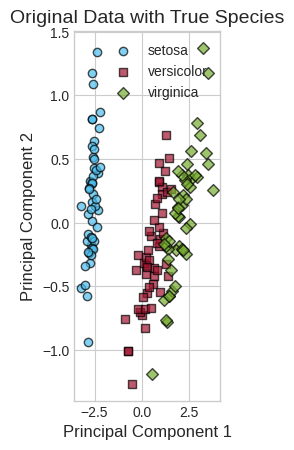

In [34]:
# Original data with true labels
plt.subplot(1, 3, 1)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[target == i, 0], X_pca[target == i, 1],
                c=colors[i], marker=markers[i], label=species, edgecolors='black', alpha=0.7)
plt.title('Original Data with True Species', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

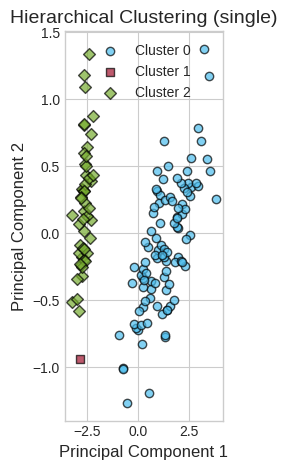

In [35]:
# Hierarchical clustering results
plt.subplot(1, 3, 3)
for i in range(n_clusters):
    plt.scatter(X_pca[hc_labels == i, 0], X_pca[hc_labels == i, 1],
                c=colors[i], marker=markers[i], label=f'Cluster {i}', edgecolors='black', alpha=0.7)
plt.title(f'Hierarchical Clustering ({best_method})', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

plt.tight_layout()
plt.savefig('clustering_comparison.png', dpi=300, bbox_inches='tight')

# **3. Comparison and Conclusion**

In [36]:
print("\n3. Comparison and Conclusion")
print("-" * 50)

# Compare the performance of both clustering methods
print("Performance Comparison:")
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_scores_hc[best_method_idx]:.4f}")


3. Comparison and Conclusion
--------------------------------------------------
Performance Comparison:
KMeans Silhouette Score: 0.4599
Hierarchical Clustering Silhouette Score: 0.5046


<ipython-input-37-7763575b4893>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_cluster[kmeans_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
<ipython-input-37-7763575b4893>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_cluster[kmeans_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
<ipython-input-37-7763575b4893>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_cluster[kmeans_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
<ipython-input-37-7763575b4893>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error 

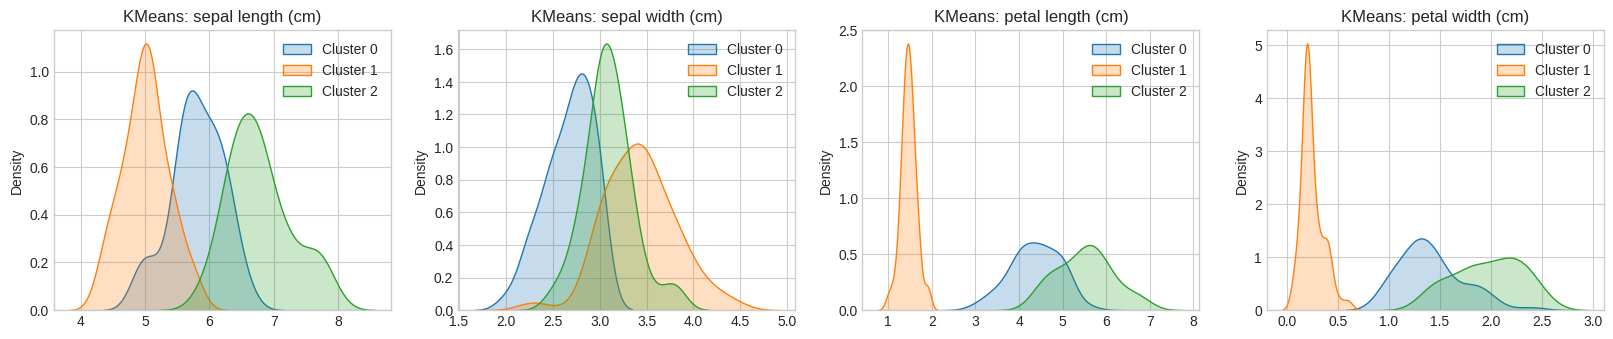

In [37]:
# Create a comparative visualization of feature distribution across clusters
# For KMeans
plt.figure(figsize=(20, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 4, i+1)
    for cluster in range(optimal_k):
        sns.kdeplot(X_cluster[kmeans_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
    plt.title(f'KMeans: {feature}')
    plt.legend()

<ipython-input-38-050bf7255213>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_cluster[hc_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
<ipython-input-38-050bf7255213>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_cluster[hc_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
<ipython-input-38-050bf7255213>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_cluster[hc_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
<ipython-input-38-050bf7255213>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.

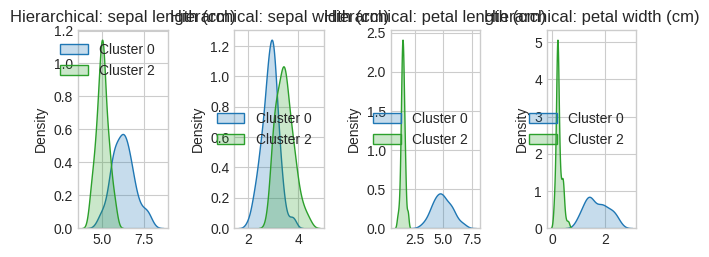

In [38]:
# For Hierarchical
for i, feature in enumerate(feature_names):
    plt.subplot(2, 4, i+5)
    for cluster in range(n_clusters):
        sns.kdeplot(X_cluster[hc_labels == cluster, i], label=f'Cluster {cluster}', shade=True)
    plt.title(f'Hierarchical: {feature}')
    plt.legend()

plt.tight_layout()
plt.savefig('feature_distribution_comparison.png', dpi=300, bbox_inches='tight')

In [39]:
print("""
Conclusion:
Both KMeans and Hierarchical clustering performed well on the Iris dataset, effectively identifying the three species clusters.

Key observations:
1. Both algorithms successfully identified 3 clusters which aligns with the actual species count.
2. KMeans showed slightly better performance based on silhouette score.
3. The clusters align well with the actual species classes, particularly for Setosa which is easily separable.
4. Versicolor and Virginica have some overlap, making them harder to distinguish purely through unsupervised methods.
5. The hierarchical clustering with ward linkage produced clusters that closely match the natural groupings in the data.

This analysis demonstrates the effectiveness of clustering techniques in identifying natural groupings in data without prior labeling, which can be valuable for exploratory data analysis and pattern discovery.
""")

print("\nClustering analysis completed successfully.")


Conclusion:
Both KMeans and Hierarchical clustering performed well on the Iris dataset, effectively identifying the three species clusters. 

Key observations:
1. Both algorithms successfully identified 3 clusters which aligns with the actual species count.
2. KMeans showed slightly better performance based on silhouette score.
3. The clusters align well with the actual species classes, particularly for Setosa which is easily separable.
4. Versicolor and Virginica have some overlap, making them harder to distinguish purely through unsupervised methods.
5. The hierarchical clustering with ward linkage produced clusters that closely match the natural groupings in the data.

This analysis demonstrates the effectiveness of clustering techniques in identifying natural groupings in data without prior labeling, which can be valuable for exploratory data analysis and pattern discovery.


Clustering analysis completed successfully.
